In [ ]:
#Description: This program uses on-Balance Volume (OBV) to determine when to buy and sell stock

In [48]:
#Import the libraries
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [47]:
#Load the data
from google.colab import files
files.upload()

Saving JO.csv.CSV to JO.csv.CSV


{'JO.csv.CSV': b'Date,Open,High,Low,Close,Adj Close,Volume\r\n2019-12-23,55.000000,55.240002,54.840000,54.910000,53.093117,9300800\r\n2019-12-24,54.799999,55.000000,54.639999,54.709999,52.899734,3359300\r\n2019-12-26,54.919998,55.020000,54.790001,55.020000,53.199478,6228500\r\n2019-12-27,55.009998,55.450001,55.000000,55.349998,53.518559,6895500\r\n2019-12-30,55.180000,55.389999,55.060001,55.270000,53.441204,6431700\r\n2019-12-31,55.200001,55.380001,54.980000,55.349998,53.518559,7982600\r\n2020-01-02,55.320000,55.430000,54.759998,54.990002,53.170471,11867700\r\n2020-01-03,54.320000,54.990002,54.090000,54.689999,52.880394,11354500\r\n2020-01-06,54.650002,54.910000,54.520000,54.669998,52.861053,14698300\r\n2020-01-07,54.450001,54.599998,54.150002,54.250000,52.454960,9973900\r\n2020-01-08,54.270000,54.639999,54.150002,54.349998,52.551643,10676000\r\n2020-01-09,55.000000,55.400002,54.840000,55.340000,53.508888,15398000\r\n2020-01-10,55.480000,55.930000,55.450001,55.529999,53.692600,13040100

In [49]:
df = pd.read_csv('JO.csv')
print(df)

           Date       Open       High        Low      Close  Adj Close  \
0    2019-12-23  55.000000  55.240002  54.840000  54.910000  53.093117   
1    2019-12-24  54.799999  55.000000  54.639999  54.709999  52.899734   
2    2019-12-26  54.919998  55.020000  54.790001  55.020000  53.199478   
3    2019-12-27  55.009998  55.450001  55.000000  55.349998  53.518559   
4    2019-12-30  55.180000  55.389999  55.060001  55.270000  53.441204   
..          ...        ...        ...        ...        ...        ...   
248  2020-12-16  53.599998  53.799999  52.939999  53.060001  53.060001   
249  2020-12-17  53.299999  53.709999  53.150002  53.270000  53.270000   
250  2020-12-18  53.080002  53.840000  52.619999  53.740002  53.740002   
251  2020-12-21  52.680000  53.000000  51.980000  52.810001  52.810001   
252  2020-12-22  52.810001  53.180000  52.389999  52.759998  52.759998   

       Volume  
0     9300800  
1     3359300  
2     6228500  
3     6895500  
4     6431700  
..        ...  

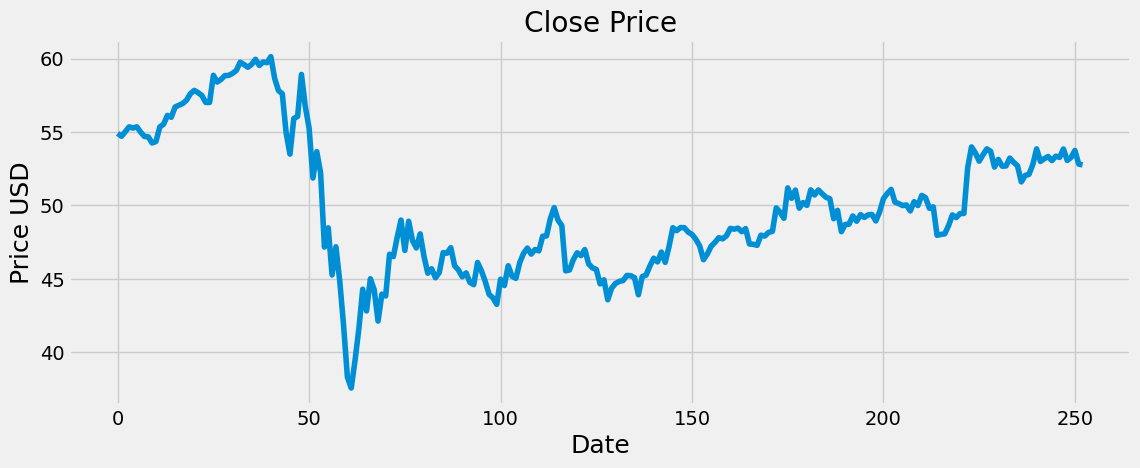

In [50]:
#Visually show the stock price
plt.figure(figsize=(12.2, 4.5))
plt.plot(df['Close'], label = 'Close')
plt.title('Close Price')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Price USD', fontsize = 18)
plt.show()

In [59]:
#Calculate the On Balance Volume (OBV)
OBV = []
OBV.append(0)

#Loop through the data set (close price) from the second row (index 1) to the end of the data set
for i in range(1, len(df.Close)):
  if df.Close[i] > df.Close[i-1]:
    OBV.append(OBV[-1] + df.Volume[i])
  elif df.Close[i] < df.Close[i-1]:
      OBV.append(OBV[-1] - df.Volume[i])
  else:
        OBV.append(OBV[-1])

In [60]:
#Store the OBV and OBV Expontential Moving Average (EMA) into new columns
df['OBV'] = OBV
df['OBV_EMA'] = df['OBV'].ewm(span=20).mean()
#Show the data
df

,Date,Open,High,Low,Close,Adj Close,Volume,OBV,OBV_EMA
0,2019-12-23,55.000000,55.240002,54.840000,54.910000,53.093117,9300800,0,0.000000e+00
1,2019-12-24,54.799999,55.000000,54.639999,54.709999,52.899734,3359300,-3359300,-1.763632e+06
2,2019-12-26,54.919998,55.020000,54.790001,55.020000,53.199478,6228500,2869200,-6.248418e+04
3,2019-12-27,55.009998,55.450001,55.000000,55.349998,53.518559,6895500,9764700,2.774472e+06
4,2019-12-30,55.180000,55.389999,55.060001,55.270000,53.441204,6431700,3333000,2.909575e+06
...,...,...,...,...,...,...,...,...,...
248,2020-12-16,53.599998,53.799999,52.939999,53.060001,53.060001,15679600,-20338000,-2.460808e+07
249,2020-12-17,53.299999,53.709999,53.150002,53.270000,53.270000,12677300,-7660700,-2.299404e+07
250,2020-12-18,53.080002,53.840000,52.619999,53.740002,53.740002,35480100,27819400,-1.815467e+07
251,2020-12-21,52.680000,53.000000,51.980000,52.810001,52.810001,14926600,12892800,-1.519776e+07


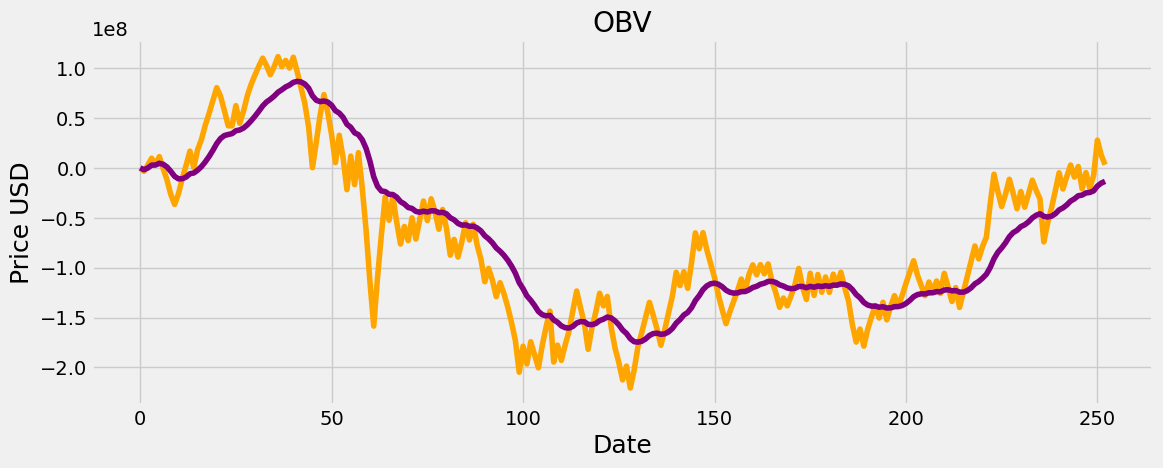

In [61]:
#Create and plot the graph
plt.figure(figsize=(12.2, 4.5))
plt.plot(df['OBV'], label = 'OBV', color = 'orange')
plt.plot(df['OBV_EMA'], label = 'OBV_EMA', color = 'purple')
plt.title('OBV')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Price USD', fontsize = 18)
plt.show()

In [81]:
#Create a function to signal when to buy and sell the stock
# If OBV > OBV_EMA Then Buy
# If OBV < OBV_EMA Then Sell
# Else Do Nothing
def buy_sell(signal, col1, col2):
  signPriceBuy = []
  sigPriceSell = []
  flag = -1
  #Loop through the length of the data set
  for i in range(0, len(signal)):
    # If OBV > OBV_EMA Then Buy --> col1 => 'OBV' and col2 => 'OBV_EMA'
    if signal[col1][i] > signal[col2][i] and flag != 1:
      signPriceBuy.append(signal['Close'][i])
      signPriceSell.append[np.nan]
      flag = 1
      # If OBV < OBV_EMA Then Sell
    elif signal[col1][i] < signal[col2][i] and flag != 0:
      signPriceSell.append(signal['Close'][i])
      signPriceBuy.append[np.nan]
      flag = 0
    else:
      signPriceSell.append[np.nan]
      signPriceBuy.append[np.nan]

    return (sigPriceSell, sigPriceBuy)

In [82]:
#Create buy and sell columns
x = buy_sell(df, 'OBV', 'OBV_EMA')
df['Buy_Signal_Price'] =  x[0]
df['Sell_Signal_Price'] = x[1]
#Show the data set
df

NameError: ignored

NameError: ignored

KeyError: ignored

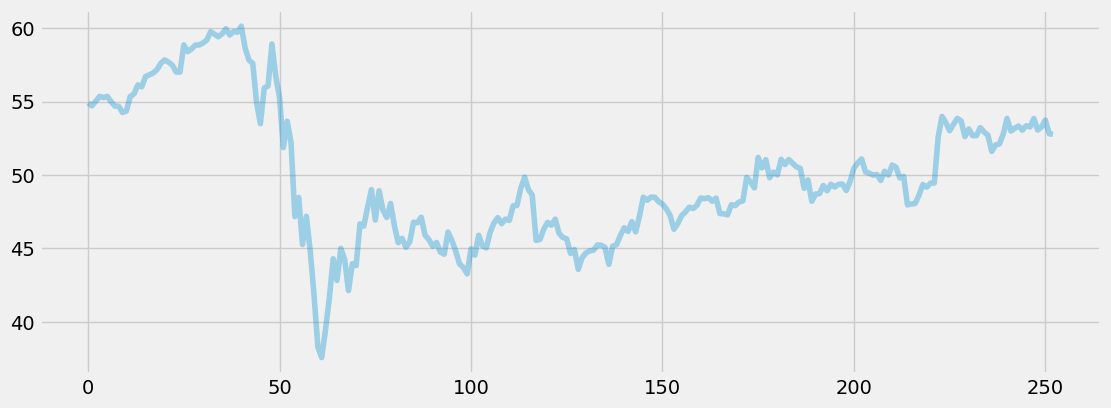

In [77]:
#Plot the buy and sell prices
plt.figure(figsize=(12.2, 4.5))
plt.plot(df['Close'], label = 'Close', alpha = 0.35)
plt.scatter(df.index, df['Buy_Signal_Price'], label = 'Buy Signal', marker = '^', alpha = 1, color = 'green')
plt.scatter(df.index, df['Sell_Signal_Price'], label = 'Sell Signal', marker = 'v', alpha = 1, color = 'red')
plt.title('Buy & Sell Signals')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Price USD', fontsize = 18)
plt.legend(loc='upper left')
plt.show()